In [1]:

%load_ext autoreload
%autoreload 2


In [2]:

from data.processed_mimic.aggregate_mimic import load_mimic_tables, select_labs, aggregate_labs, merge_with_patients_admissions, save_dataset

In [3]:
# MIMIC iv dataset
patients, admissions, labevents, labitems = load_mimic_tables()
selected_labs = ['Potassium', 'Sodium', 'Creatinine', 'Chloride', 'Urea Nitrogen', 'Hematocrit']
filtered = select_labs(labevents, labitems, selected_labs)
admission_labs = aggregate_labs(filtered)
full_data = merge_with_patients_admissions(admission_labs, patients, admissions)
save_dataset(full_data)


Loading raw MIMIC CSVs...
Patients: (100, 6), Admissions: (275, 16), Lab events: (107727, 16), Lab items: (1622, 4)
Saved processed dataset to: c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\data\processed_mimic\processed_admissions_selected_labs.csv


In [4]:
import sys
sys.executable


'c:\\Users\\sofia\\OneDrive\\Υπολογιστής\\Thesis_New\\.venv\\Scripts\\python.exe'

In [5]:
# !c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\.venv\Scripts\python.exe -m pip install jpype1

In [ ]:
# import os
# os.path.exists(r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll")


True

In [ ]:
# import jpype

# jvm_path = r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll"

# if not jpype.isJVMStarted():
#     jpype.startJVM(
#         jvm_path,
#         "-ea",
#         classpath=[r"jar_files/*"]
#     )


In [6]:
# #import jpype
# #jpype.startJVM("-ea", classpath=['jar_files/*'])

# from data.data_generation.simulate_data import simulate_data_tetrad_simple

# dag, data = simulate_data_tetrad_simple(
#     n_nodes=10,
#     n_samples=500,
#     avg_degree=2,
#     max_degree=3,
#     seed=1
# )

# print(data.head())
# print(dag)


In [6]:
from data.synthetic_data_generation.final_scm_simulator import simulate_linear_scm

In [ ]:


dag, data = simulate_linear_scm(
    n_nodes=10,
    n_samples=500,
    avg_degree=2,
    seed=1
)



print(data.head())
print(dag)


         X1        X2        X3        X4        X5        X6         X7  \
0 -0.859907 -0.307041  2.687140  3.473203  1.056178 -2.629208 -11.185799   
1  1.772608 -0.384749 -0.364626  0.272269 -0.982546  0.771471   2.004912   
2 -1.110363  0.015189  0.892394  0.990523 -0.206393 -0.420172  -2.543822   
3  0.181214 -0.812620  1.646042  2.620392 -0.167106 -1.334949  -3.705845   
4  0.564345 -0.787802  0.054444 -1.211764  0.502753  1.471316  -1.355405   

         X8        X9       X10  
0 -2.680825 -0.980511  2.074304  
1  2.108196 -0.089284 -0.364290  
2 -0.136003  0.073278  1.045294  
3 -1.216911 -1.680634  1.839651  
4 -0.127234  1.015502  1.905706  
     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
X1    0   0   1   0   0   0   0   0   0    0
X2    0   0   1   0   0   0   0   1   0    1
X3    0   0   0   1   0   0   1   1   0    0
X4    0   0   0   0   0   1   1   1   1    0
X5    0   0   0   0   0   0   1   0   0    0
X6    0   0   0   0   0   0   0   1   0    0
X7    0   0   0   0   0 

In [16]:
import os

output_dir = os.path.join("data", "synthetic_data")
os.makedirs(output_dir, exist_ok=True)

data.to_csv(os.path.join(output_dir, "simulated_data.csv"), index=False)
dag.to_csv(os.path.join(output_dir, "simulated_dag.csv"))


In [20]:
X = data.values


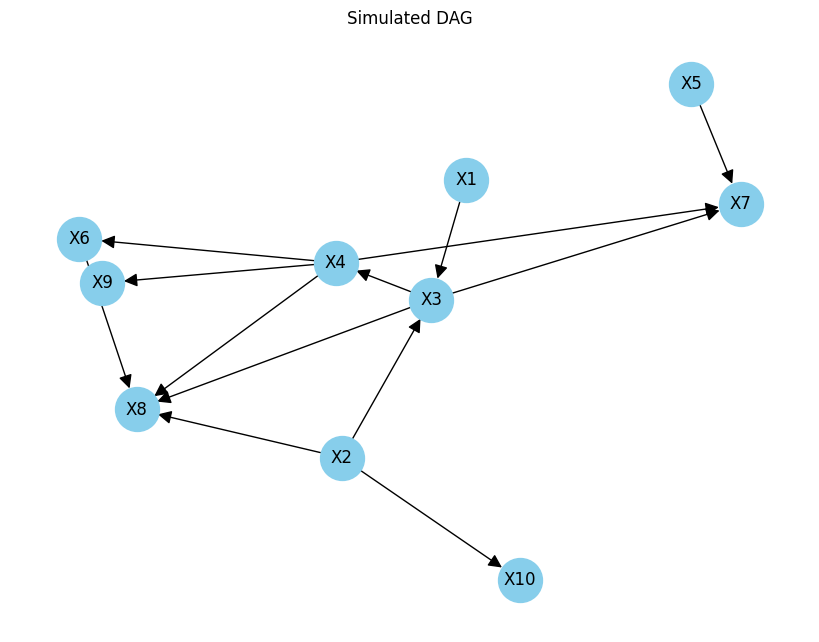

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the adjacency matrix to a networkx DiGraph
G = nx.from_pandas_adjacency(dag, create_using=nx.DiGraph)

# Draw the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', arrowsize=20)
plt.title("Simulated DAG")
plt.show()


In [21]:
from causal_discovery.pc.pc_algorithm import PC
from causal_discovery.ci_tests.listwise import ListwiseCITest

pc = PC(ci_test=ListwiseCITest(), alpha=0.05)
G, sep_sets = pc.learn_skeleton(X)


In [22]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Edges:")
for e in G.edges():
    print(e)


Number of nodes: 10
Number of edges: 12
Edges:
(0, 3)
(0, 7)
(1, 2)
(1, 7)
(1, 9)
(2, 3)
(2, 6)
(3, 5)
(3, 6)
(3, 8)
(4, 6)
(5, 7)


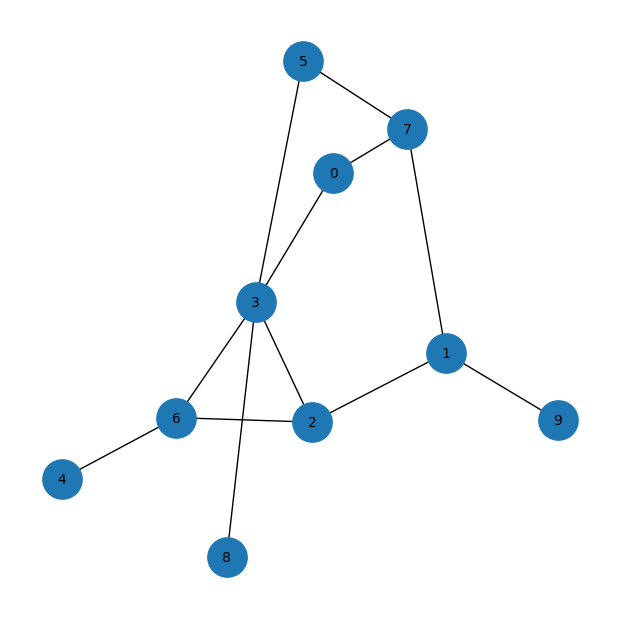

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(6, 6))
nx.draw(
    G,
    with_labels=True,
    node_size=800,
    font_size=10
)
plt.show()


In [7]:
from data.synthetic_data_generation.missingness import apply_mcar, apply_mar, apply_missingness

In [8]:
dag, data_complete = simulate_linear_scm(
    n_nodes=5,
    n_samples=1000,
    seed=42
)

# MCAR reference
data_mcar = apply_missingness(
    data_complete,
    mode="MCAR",
    missing_prob=0.2,
    seed=1
)

# MAR experiment
data_mar = apply_missingness(
    data_complete,
    mode="MAR",
    target_var="X2",
    parent_var="X1",
    threshold=-0.5,
    p_high=0.9,
    p_low=0.1,
    seed=1
)


In [9]:
import os

# Create output directory
output_dir = os.path.join("data", "synthetic_data")
os.makedirs(output_dir, exist_ok=True)

# Save datasets
data_complete.to_csv(
    os.path.join(output_dir, "data_complete.csv"),
    index=False
)

data_mar.to_csv(
    os.path.join(output_dir, "data_mar.csv"),
    index=False
)

data_mcar.to_csv(
    os.path.join(output_dir, "data_mcar.csv"),
    index=False
)

# Save DAG (keep index!)
dag.to_csv(
    os.path.join(output_dir, "dag_ground_truth.csv")
)
